# ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<h1><center> Analysis of World Happiness Index per country from 2015 up to 2020</center></h1>

This project idea is obtained from Coursra's recommended data analyst starter project.<br>
In recent years, happiness has become the strongest indicator of a country’s social progress. That’s why the World Happiness Report was first published in 2012 for the UN High Level Meeting on well-being. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_excel("DataPanelWHR2021C2.xls", sheet_name = 0)
pd.set_option('display.max_rows',df.shape[0]+1) # to display all rows in dataframe
# Rename the columns for the ease of analysis.
df = df.rename(columns={"Country name": "Country",
                   "Life Ladder": "Life_ladder",
                  "Log GDP per capita":"GDP",
                  "Social support":"Social_support",
                  "Healthy life expectancy at birth":"Life_expectancy_birth",
                  "Freedom to make life choices":"Freedom",
                  "Perceptions of corruption":"Corruption",
                  "Positive affect":"Positive_affect",
                  "Negative affect":"Negative_affect"})
df.info() # show data frame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                1949 non-null   object 
 1   year                   1949 non-null   int64  
 2   Life_ladder            1949 non-null   float64
 3   GDP                    1913 non-null   float64
 4   Social_support         1936 non-null   float64
 5   Life_expectancy_birth  1894 non-null   float64
 6   Freedom                1917 non-null   float64
 7   Generosity             1860 non-null   float64
 8   Corruption             1839 non-null   float64
 9   Positive_affect        1927 non-null   float64
 10  Negative_affect        1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


Rows of dataframe will be dropped if year is less than 2015 since we will only focused on 5 years period of between 2015 and 2020.

In [2]:
df = df.drop(df[df.year < 2015].index)
df = df.reset_index(drop=True) # reset the index values to get sequential indexs

In [3]:
print(df)# show data frame's information

                       Country  year  Life_ladder        GDP  Social_support  \
0                  Afghanistan  2015     3.982855   7.701992        0.528597   
1                  Afghanistan  2016     4.220169   7.696560        0.559072   
2                  Afghanistan  2017     2.661718   7.697381        0.490880   
3                  Afghanistan  2018     2.694303   7.691767        0.507516   
4                  Afghanistan  2019     2.375092   7.697248        0.419973   
5                      Albania  2015     4.606651   9.403102        0.639356   
6                      Albania  2016     4.511101   9.437311        0.638411   
7                      Albania  2017     4.639548   9.475548        0.637698   
8                      Albania  2018     5.004403   9.517920        0.683592   
9                      Albania  2019     4.995318   9.544080        0.686365   
10                     Albania  2020     5.364910   9.497252        0.710115   
11                     Algeria  2016    

We will extract rows from original datafrme accordance with years(2015 - 2020). There will be 6 separated dataframes with respective years.

In [4]:
df_2015 = df[df.year == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2016 = df[df.year == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2017 = df[df.year == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2018 = df[df.year == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2019 = df[df.year == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2020 = df[df.year == 2020]
df_2020 = df_2020.reset_index(drop=True)

In each separated dataframe, missing data values will be replaced with zeros.

In [5]:
df_2015 = df_2015.fillna(0)
df_2016 = df_2016.fillna(0)
df_2017 = df_2017.fillna(0)
df_2018 = df_2018.fillna(0)
df_2019 = df_2019.fillna(0)
df_2020 = df_2020.fillna(0)

To make sure that missing values are fixed, info() method is used.

In [6]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                95 non-null     object 
 1   year                   95 non-null     int64  
 2   Life_ladder            95 non-null     float64
 3   GDP                    95 non-null     float64
 4   Social_support         95 non-null     float64
 5   Life_expectancy_birth  95 non-null     float64
 6   Freedom                95 non-null     float64
 7   Generosity             95 non-null     float64
 8   Corruption             95 non-null     float64
 9   Positive_affect        95 non-null     float64
 10  Negative_affect        95 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 8.3+ KB


In respective data frame, each is sorted with 'Life_ladder'column in descending order.
And then, each data frame was added a new column namely 'Rank'.The measurement fo well-being mainly relies on life evaluations (Life Ladder) column as the more stable measure of the quality of people's lives. 'Rank' column is added 
according to each country's life ladder values. 
<br>Note: In the original survey, some countries were not in some years. So, the complete happiness report of total countries in the world between 2015 and 2020 (inclusive) will not be available.

In [7]:
df_2015.sort_values(by = ['Life_ladder'], ascending = False, inplace = True, ignore_index = True)
df_2016.sort_values(by = ['Life_ladder'], ascending = False, inplace = True, ignore_index = True)
df_2017.sort_values(by = ['Life_ladder'], ascending = False, inplace = True, ignore_index = True)
df_2018.sort_values(by = ['Life_ladder'], ascending = False, inplace = True, ignore_index = True)
df_2019.sort_values(by = ['Life_ladder'], ascending = False, inplace = True, ignore_index = True)
df_2020.sort_values(by = ['Life_ladder'], ascending = False, inplace = True, ignore_index = True)

In [8]:
df_2015['Rank'] = df_2015['Life_ladder'].rank(ascending = False).apply(np.int64)
# Rearrange the column names for df_2015
column_names = ["Country","year","Rank","Life_ladder","GDP","Social_support","Life_expectancy_birth","Freedom",
               "Generosity","Corruption","Positive_affect","Negative_affect"]
df_2015 = df_2015.reindex(columns=column_names)


In [9]:
df_2016['Rank'] = df_2016['Life_ladder'].rank(ascending = False).apply(np.int64)
# Rearrange the column names for df_2016
column_names = ["Country","year","Rank","Life_ladder","GDP","Social_support","Life_expectancy_birth","Freedom",
               "Generosity","Corruption","Positive_affect","Negative_affect"]
df_2016 = df_2016.reindex(columns=column_names)

In [10]:
df_2017['Rank'] = df_2017['Life_ladder'].rank(ascending = False).apply(np.int64)
# Rearrange the column names for df_2017
column_names = ["Country","year","Rank","Life_ladder","GDP","Social_support","Life_expectancy_birth","Freedom",
               "Generosity","Corruption","Positive_affect","Negative_affect"]
df_2017 = df_2017.reindex(columns=column_names)

In [11]:
df_2018['Rank'] = df_2018['Life_ladder'].rank(ascending = False).apply(np.int64)
# Rearrange the column names for df_2018
column_names = ["Country","year","Rank","Life_ladder","GDP","Social_support","Life_expectancy_birth","Freedom",
               "Generosity","Corruption","Positive_affect","Negative_affect"]
df_2018 = df_2018.reindex(columns=column_names)

In [12]:
df_2019['Rank'] = df_2019['Life_ladder'].rank(ascending = False).apply(np.int64)
# Rearrange the column names for df_2019
column_names = ["Country","year","Rank","Life_ladder","GDP","Social_support","Life_expectancy_birth","Freedom",
               "Generosity","Corruption","Positive_affect","Negative_affect"]
df_2019 = df_2019.reindex(columns=column_names)

In [13]:
df_2020['Rank'] = df_2020['Life_ladder'].rank(ascending = False).apply(np.int64)
# Rearrange the column names for df_2020
column_names = ["Country","year","Rank","Life_ladder","GDP","Social_support","Life_expectancy_birth","Freedom",
               "Generosity","Corruption","Positive_affect","Negative_affect"]
df_2020 = df_2020.reindex(columns=column_names)
df_2020

,Country,year,Rank,Life_ladder,GDP,Social_support,Life_expectancy_birth,Freedom,Generosity,Corruption,Positive_affect,Negative_affect
0,Finland,2020,1,7.889350,10.750446,0.961621,72.099998,0.962424,-0.115532,0.163636,0.744292,0.192898
1,Iceland,2020,2,7.575490,10.824201,0.983286,73.000000,0.948627,0.160274,0.644064,0.863018,0.171795
2,Denmark,2020,3,7.514631,10.909995,0.947371,73.000000,0.937932,0.052293,0.213842,0.817664,0.227102
3,Switzerland,2020,4,7.508435,11.080893,0.946316,74.699997,0.917343,-0.063502,0.280367,0.768705,0.193229
4,Netherlands,2020,5,7.504448,10.900500,0.943956,72.500000,0.934523,0.151298,0.280605,0.783991,0.246511
5,Sweden,2020,6,7.314341,10.837904,0.935582,72.800003,0.951182,0.090818,0.203440,0.766376,0.221933
6,Germany,2020,7,7.311898,10.833499,0.905080,72.800003,0.864356,-0.060048,0.424089,0.759594,0.205927
7,Norway,2020,8,7.290032,11.042160,0.955980,73.400002,0.964561,0.075149,0.271083,0.823094,0.216034
8,New Zealand,2020,9,7.257382,10.600457,0.951991,73.599998,0.918155,0.125260,0.282768,0.849415,0.208541
9,Austria,2020,10,7.213489,10.851118,0.924831,73.599998,0.911910,0.011032,0.463830,0.769317,0.206500


Top 10 happinest countries in the world from 2015 up to 2020 are extracted.

In [14]:
top10_15 = df_2015.loc[df_2015['Rank'] < 11,['Country']]
top10_15.rename(columns = {'Country':'2015'}, inplace = True)
top10_15.index = top10_15.index + 1

top10_16 = df_2016.loc[df_2016['Rank'] < 11,['Country']]
top10_16.rename(columns = {'Country':'2016'}, inplace = True)
top10_16.index = top10_16.index + 1

top10_17 = df_2017.loc[df_2017['Rank'] < 11,['Country']]
top10_17.rename(columns = {'Country':'2017'}, inplace = True)
top10_17.index = top10_17.index + 1

top10_18 = df_2018.loc[df_2018['Rank'] < 11,['Country']]
top10_18.rename(columns = {'Country':'2018'}, inplace = True)
top10_18.index = top10_18.index + 1

top10_19 = df_2019.loc[df_2019['Rank'] < 11,['Country']]
top10_19.rename(columns = {'Country':'2019'}, inplace = True)
top10_19.index = top10_19.index + 1

top10_20 = df_2020.loc[df_2020['Rank'] < 11,['Country']]
top10_20.rename(columns = {'Country':'2020'}, inplace = True)
top10_20.index = top10_20.index + 1


In [15]:
frames = [top10_15,top10_16,top10_17,top10_18,top10_19,top10_20]
top10 = frames[0].join(frames[1:])
top10

,2015,2016,2017,2018,2019,2020
1,Norway,Finland,Finland,Finland,Finland,Finland
2,Switzerland,Norway,Denmark,Denmark,Switzerland,Iceland
3,Denmark,Denmark,Norway,Switzerland,Denmark,Denmark
4,Iceland,Netherlands,Iceland,Netherlands,Iceland,Switzerland
5,Finland,Iceland,Switzerland,Norway,Norway,Netherlands
6,New Zealand,Switzerland,Netherlands,Austria,Netherlands,Sweden
7,Canada,Sweden,Canada,Sweden,Luxembourg,Germany
8,Netherlands,Australia,Israel,New Zealand,Sweden,Norway
9,Australia,Canada,New Zealand,Luxembourg,Israel,New Zealand
10,Sweden,New Zealand,Austria,United Kingdom,Ireland,Austria


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


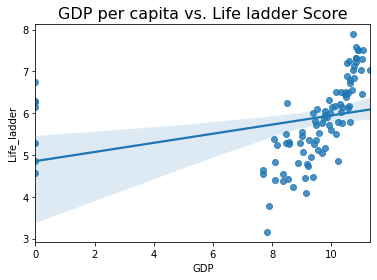

In [16]:
#sb.regplot(x = "Freedom" , y = "Life_ladder", ci = None, data =df_2020, truncate = True )
#Plotting Regplot with Seaborn
plt.figure(figsize = (6,4))
sb.regplot(df_2020.GDP, df_2020.Life_ladder)
plt.title('GDP per capita vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


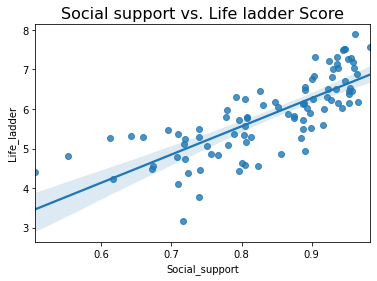

In [17]:
sb.regplot(df_2020.Social_support, df_2020.Life_ladder)
plt.title('Social support vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


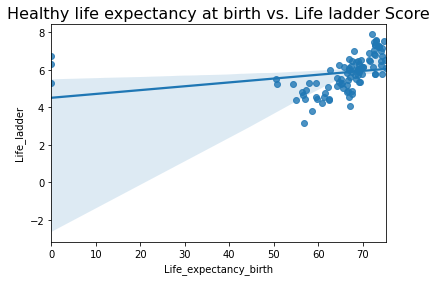

In [18]:
sb.regplot(df_2020.Life_expectancy_birth, df_2020.Life_ladder)
plt.title('Healthy life expectancy at birth vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


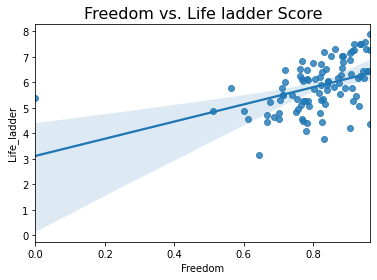

In [19]:
sb.regplot(df_2020.Freedom, df_2020.Life_ladder)
plt.title('Freedom vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


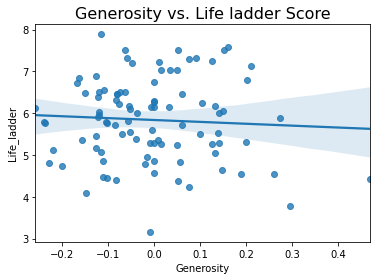

In [20]:
sb.regplot(df_2020.Generosity, df_2020.Life_ladder)
plt.title('Generosity vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


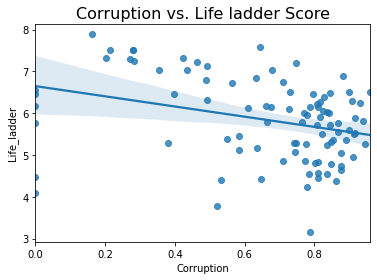

In [21]:
sb.regplot(df_2020.Corruption, df_2020.Life_ladder)
plt.title('Corruption vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


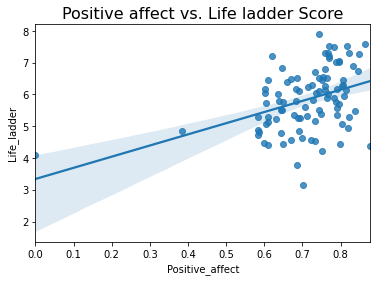

In [22]:
sb.regplot(df_2020.Positive_affect, df_2020.Life_ladder)
plt.title('Positive affect vs. Life ladder Score', fontsize = 16)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


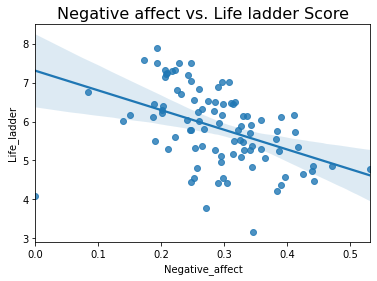

In [23]:
sb.regplot(df_2020.Negative_affect, df_2020.Life_ladder)
plt.title('Negative affect vs. Life ladder Score', fontsize = 16)
plt.show()

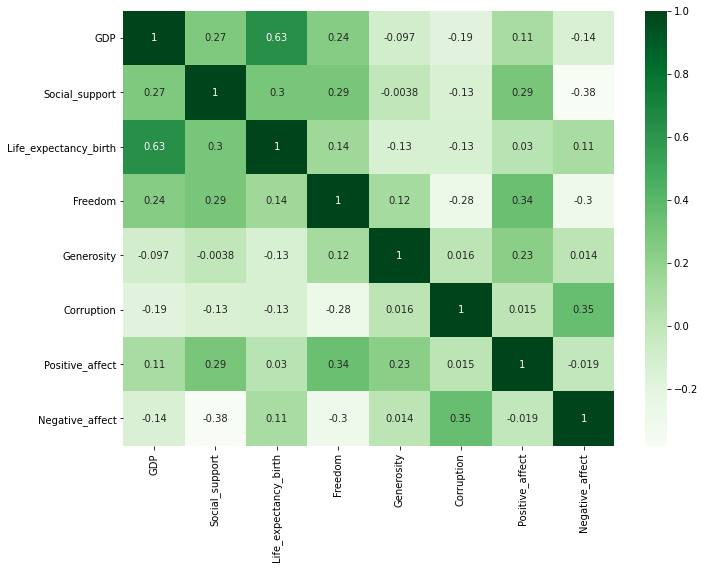

In [24]:
df_corr = df_2020.iloc[: , [4,5,6,7,8,9,10,11]].copy()
corr = df_corr.corr()
plt.figure(figsize=(11,8))
sb.heatmap(corr, cmap="Greens",annot=True)
plt.show()

Data values are sorted descendingly according to generosity and return new data frames.
This process goes same for each year.

In [25]:
generosity_2020 = df_2020.sort_values(by = ['Generosity'], ascending = False, ignore_index = True)
generosity_2019 = df_2019.sort_values(by = ['Generosity'], ascending = False, ignore_index = True)
generosity_2018 = df_2018.sort_values(by = ['Generosity'], ascending = False, ignore_index = True)
generosity_2017 = df_2017.sort_values(by = ['Generosity'], ascending = False, ignore_index = True)
generosity_2016 = df_2016.sort_values(by = ['Generosity'], ascending = False, ignore_index = True)
generosity_2015 = df_2015.sort_values(by = ['Generosity'], ascending = False, ignore_index = True)

Let focus on our country, Myanmar. Myanamr has apparently been as a top country in terms of generosity.<br>
Thus, plotting the top ten countries in terms of generoisty in each year will make easiser to get the insights.

In [42]:
xval = generosity_2020['Country'].iloc[:10]
yval = generosity_2020['Generosity'].iloc[:10]
x_y_2020 = pd.DataFrame({'Country':xval,
      'Generosity': yval})

,Country,Generosity
0,Myanmar,0.470258
1,Tanzania,0.295272
2,Thailand,0.273056
3,Kenya,0.259970
4,Australia,0.210030
5,United Kingdom,0.202508
6,Ghana,0.199632
7,Ethiopia,0.188497
8,Iceland,0.160274
9,Netherlands,0.151298


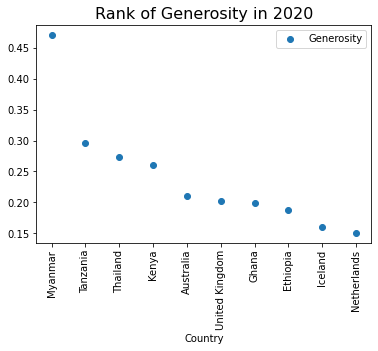

In [60]:
x_y_2020.plot(x= 'Country', y= 'Generosity' , style='o')
plt.title('Rank of Generosity in 2020', fontsize = 16)
plt.xticks(x_y_2020.index, x_y_2020['Country'], rotation=90)
plt.show()

In [58]:
xval = generosity_2019['Country'].iloc[:10]
yval = generosity_2019['Generosity'].iloc[:10]
x_y_2019 = pd.DataFrame({'Country':xval,
      'Generosity': yval})

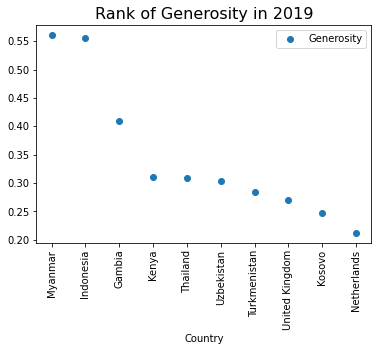

In [61]:
x_y_2019.plot(x= 'Country', y= 'Generosity' , style='o')
plt.title('Rank of Generosity in 2019', fontsize = 16)
plt.xticks(x_y_2019.index, x_y_2019['Country'], rotation=90)
plt.show()

In [62]:
xval = generosity_2018['Country'].iloc[:10]
yval = generosity_2018['Generosity'].iloc[:10]
x_y_2018 = pd.DataFrame({'Country':xval,
      'Generosity': yval})

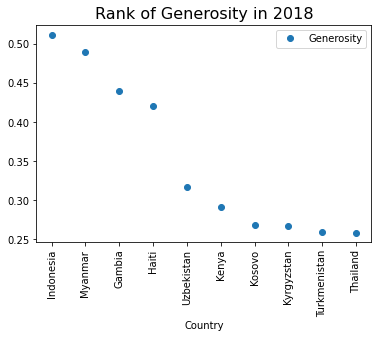

In [63]:
x_y_2018.plot(x= 'Country', y= 'Generosity' , style='o')
plt.title('Rank of Generosity in 2018', fontsize = 16)
plt.xticks(x_y_2018.index, x_y_2018['Country'], rotation=90)
plt.show()

In [64]:
xval = generosity_2017['Country'].iloc[:10]
yval = generosity_2017['Generosity'].iloc[:10]
x_y_2017 = pd.DataFrame({'Country':xval,
      'Generosity': yval})

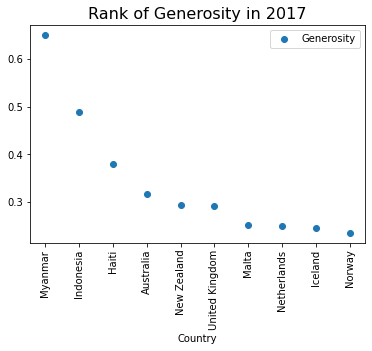

In [65]:
x_y_2017.plot(x= 'Country', y= 'Generosity' , style='o')
plt.title('Rank of Generosity in 2017', fontsize = 16)
plt.xticks(x_y_2017.index, x_y_2017['Country'], rotation=90)
plt.show()

In [66]:
xval = generosity_2016['Country'].iloc[:10]
yval = generosity_2016['Generosity'].iloc[:10]
x_y_2016 = pd.DataFrame({'Country':xval,
      'Generosity': yval})

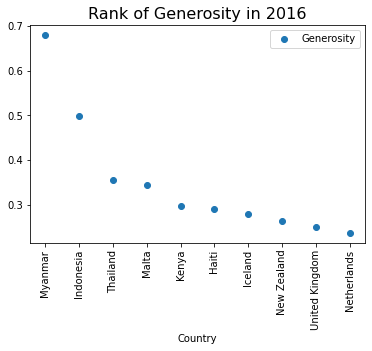

In [67]:
x_y_2016.plot(x= 'Country', y= 'Generosity' , style='o')
plt.title('Rank of Generosity in 2016', fontsize = 16)
plt.xticks(x_y_2016.index, x_y_2016['Country'], rotation=90)
plt.show()

In [68]:
xval = generosity_2015['Country'].iloc[:10]
yval = generosity_2015['Generosity'].iloc[:10]
x_y_2015 = pd.DataFrame({'Country':xval,
      'Generosity': yval})

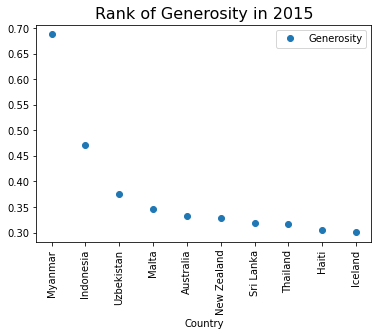

In [69]:
x_y_2015.plot(x= 'Country', y= 'Generosity' , style='o')
plt.title('Rank of Generosity in 2015', fontsize = 16)
plt.xticks(x_y_2015.index, x_y_2015['Country'], rotation=90)
plt.show()